In [12]:
#logistic regression
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [13]:
# Set a random seed for reproducibility
np.random.seed(24)

# Generate synthetic data for 1 feature and 1 binary target
n_samples = 200  # Number of samples

# Feature (random values between 0 and 1)
X = np.random.rand(n_samples, 1)

# Coefficient and bias for linear combination
coefficient = 2.0  # Adjusted to balance the probabilities
bias = -1.0        # Negative bias to allow mix of 0 and 1 in target

# Generate target probabilities using the feature and sigmoid function
linear_combination = coefficient * X[:, 0] + bias
probabilities = 1 / (1 + np.exp(-linear_combination))

# Generate binary target (0 or 1) based on probabilities
y = (probabilities > 0.5).astype(int)

# Create a DataFrame
data = pd.DataFrame({'Feature': X[:, 0], 'Target': y})

# Save to CSV
file_path = "C:/python codes/ML_trial/ML_test/one_feature_logistic_regression.csv"
data.to_csv(file_path, index=False)

file_path


'C:/python codes/ML_trial/ML_test/one_feature_logistic_regression.csv'

In [ ]:
#generate a csv for logistic regression

# Set a random seed for reproducibility
np.random.seed(24)

# Generate synthetic data
n_samples = 200  # Number of samples
n_features = 4    # Number of features

# Features (random numbers between 0 and 1)
X = np.random.rand(n_samples, n_features)

# Coefficients for a linear combination
coefficients = np.array([2.5, -1.2, 0.8, -0.5])

# Generate target probabilities using a linear combination of features and a sigmoid function
linear_combination = np.dot(X, coefficients) + 0.3  # Add some bias
probabilities = 1 / (1 + np.exp(-linear_combination))

# Generate binary target (0 or 1) based on probabilities
y = (probabilities > 0.5).astype(int)

# Create a DataFrame
columns = [f"Feature_{i+1}" for i in range(n_features)] + ["Target"]
data = pd.DataFrame(np.column_stack((X, y)), columns=columns)

# Save to CSV
file_path = "C:/python codes/ML_trial/ML_test/logistic_regression_data.csv"
data.to_csv(file_path, index=False)

file_path


In [2]:
df = pd.read_csv("logistic_regression_data.csv")
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Target
0,0.960017,0.699512,0.999867,0.220067,1.0
1,0.361056,0.739841,0.996456,0.316347,1.0
2,0.136545,0.383980,0.320519,0.366415,1.0
3,0.709652,0.900142,0.534115,0.247294,1.0
4,0.671807,0.561729,0.542560,0.893448,1.0


In [3]:
#new df for testing binary classification logistic regression
df1 = pd.read_csv("one_feature_logistic_regression.csv")
df1

,Feature,Target
0,0.960017,1
1,0.699512,1
2,0.999867,1
3,0.220067,0
4,0.361056,0
...,...,...
195,0.702289,1
196,0.102263,0
197,0.092677,0
198,0.725037,1


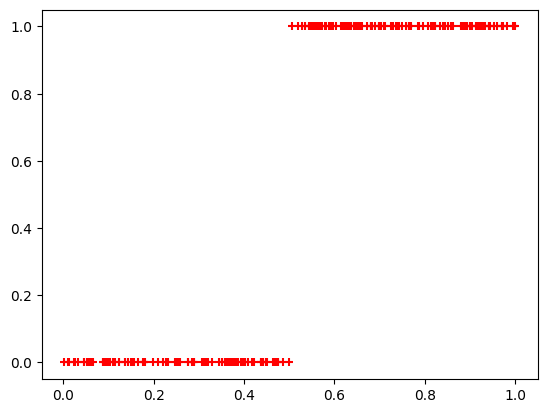

In [4]:
plt.scatter(df1.Feature, df1.Target, marker = '+', color = 'red')

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df1[['Feature']], df1.Target,train_size = 0.9)

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
binary_model = LogisticRegression()

In [8]:
binary_model.fit(x_train, y_train)

LogisticRegression()

In [9]:
binary_model.predict(x_test)

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1],
      dtype=int64)

In [10]:
binary_model.score(x_test, y_test)

0.95

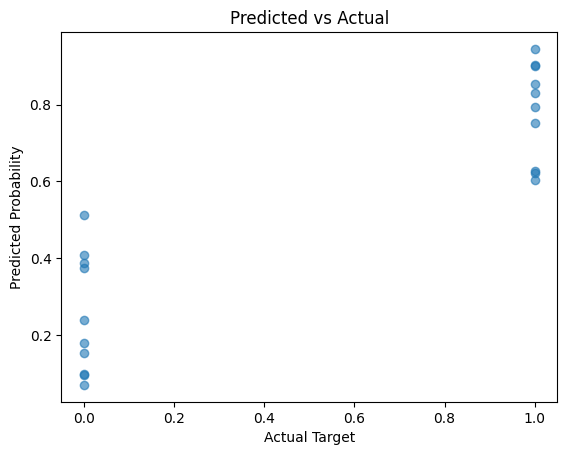

In [26]:
# Predict probabilities for the test set
y_pred_probs = binary_model.predict_proba(x_test)[:, 1]

# Scatter plot of actual vs predicted probabilities
plt.scatter(y_test, y_pred_probs, alpha=0.6)
plt.xlabel("Actual Target")
plt.ylabel("Predicted Probability")
plt.title("Predicted vs Actual")
plt.show()

In [14]:
df

,Feature_1,Feature_2,Feature_3,Feature_4,Target
0,0.960017,0.699512,0.999867,0.220067,1.0
1,0.361056,0.739841,0.996456,0.316347,1.0
2,0.136545,0.383980,0.320519,0.366415,1.0
3,0.709652,0.900142,0.534115,0.247294,1.0
4,0.671807,0.561729,0.542560,0.893448,1.0
...,...,...,...,...,...
195,0.571674,0.547858,0.854526,0.698409,1.0
196,0.346673,0.172349,0.361665,0.980086,1.0
197,0.186261,0.333967,0.691397,0.301019,1.0
198,0.767711,0.718500,0.905146,0.992647,1.0


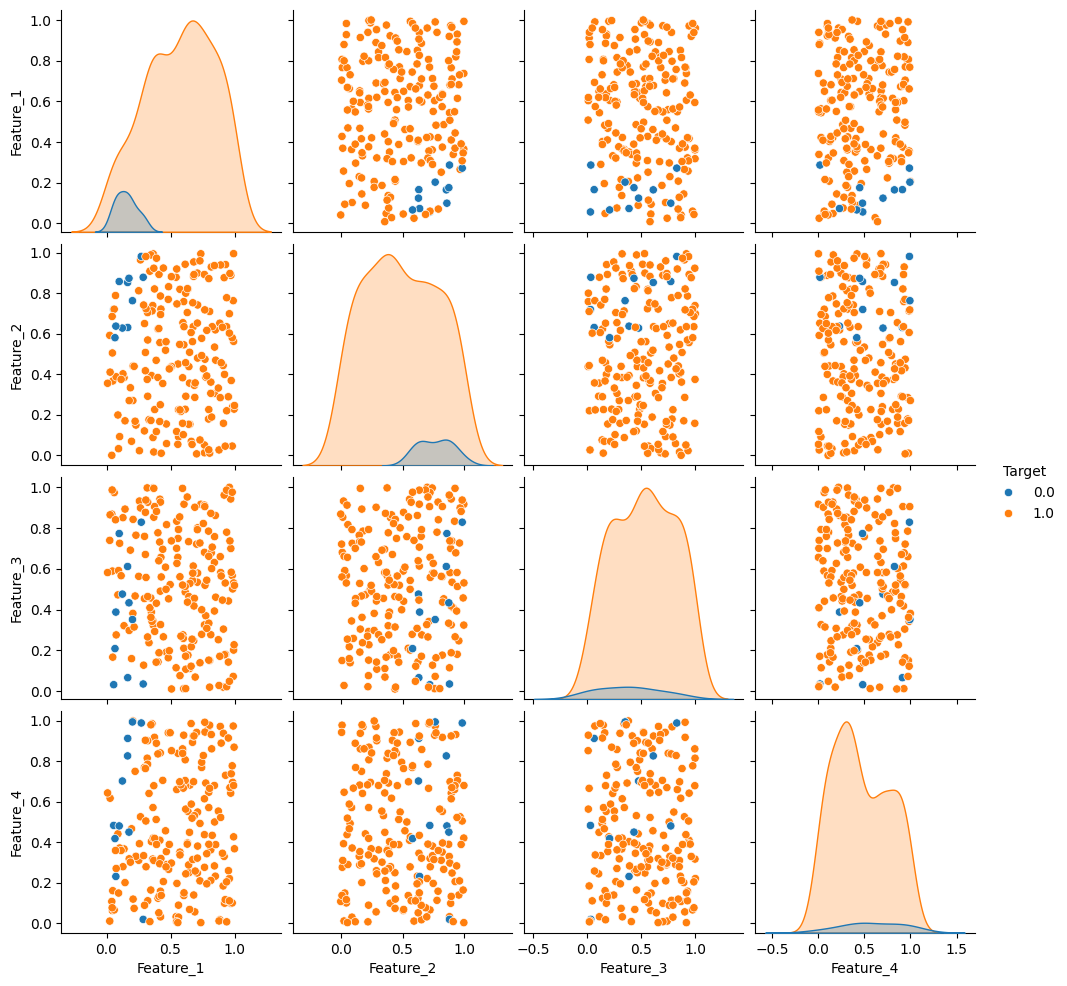

In [13]:
#for multi feature datasets, use pairplot for visualization
sns.pairplot(df, hue="Target")
plt.show()

In [15]:
x = df.drop(columns = ["Target"])
y = df["Target"]
x

,Feature_1,Feature_2,Feature_3,Feature_4
0,0.960017,0.699512,0.999867,0.220067
1,0.361056,0.739841,0.996456,0.316347
2,0.136545,0.383980,0.320519,0.366415
3,0.709652,0.900142,0.534115,0.247294
4,0.671807,0.561729,0.542560,0.893448
...,...,...,...,...
195,0.571674,0.547858,0.854526,0.698409
196,0.346673,0.172349,0.361665,0.980086
197,0.186261,0.333967,0.691397,0.301019
198,0.767711,0.718500,0.905146,0.992647


In [16]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
195    1.0
196    1.0
197    1.0
198    1.0
199    1.0
Name: Target, Length: 200, dtype: float64

In [18]:
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(x, y, train_size = 0.9, random_state = 24)

In [19]:
binary_model_m = LogisticRegression()
binary_model_m.fit(x_train_m, y_train_m)

LogisticRegression()

In [20]:
y_pred = binary_model_m.predict(x_train_m)

In [22]:
accuracy_m = binary_model_m.score(x_test_m, y_test_m)
accuracy_m

0.95

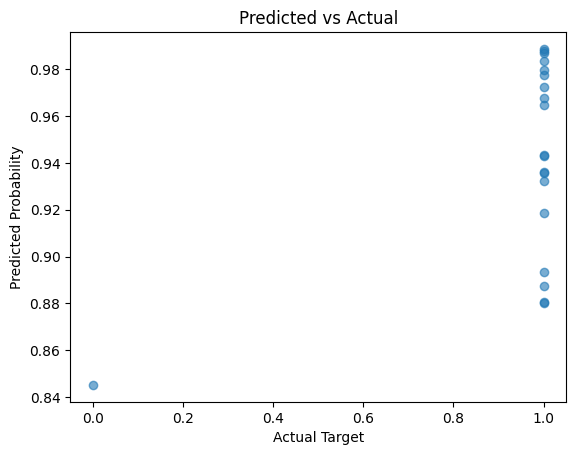

In [24]:
# Predict probabilities for the test set
y_pred_probs_m = binary_model_m.predict_proba(x_test_m)[:, 1]

# Scatter plot of actual vs predicted probabilities
plt.scatter(y_test_m, y_pred_probs_m, alpha=0.6)
plt.xlabel("Actual Target")
plt.ylabel("Predicted Probability")
plt.title("Predicted vs Actual")
plt.show()